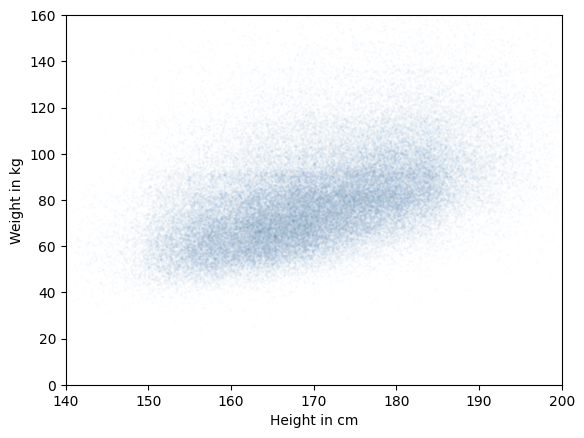

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

brfss = pd.read_hdf('brfss.hdf5', 'brfss')
height = brfss['HTM4']
weight = brfss['WTKG3']

height_jitter = height + np.random.normal(0, 2, size=len(brfss))
weight_jitter = weight + np.random.normal(0, 2, size=len(brfss))
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.01)

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.axis([140, 200, 0, 160])
plt.show()

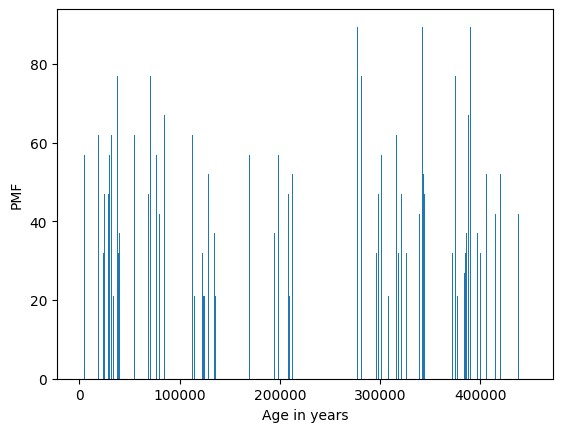

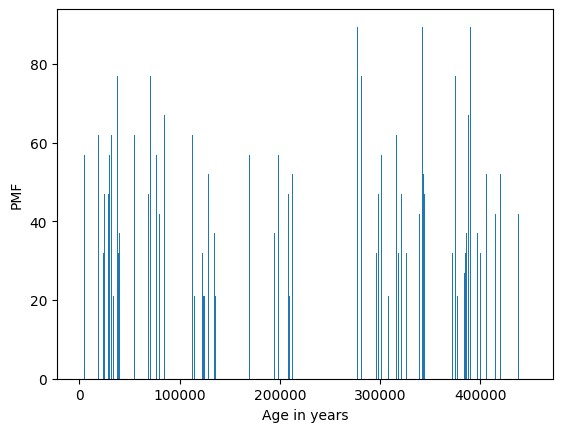

In [11]:
from empiricaldist import Pmf

# Extract age
age = brfss['AGE']

# Plot the PMF
pmf_age = Pmf(age)
pmf_age.bar()

# Label the axes
plt.xlabel('Age in years')
plt.ylabel('PMF')
plt.show()

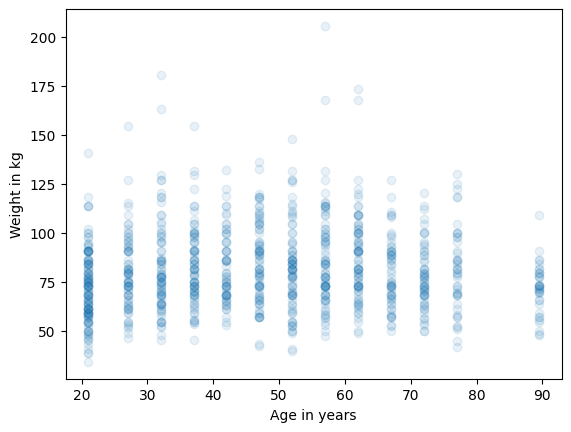

In [5]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Extract age and weight
age = brfss['AGE']
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o',alpha=0.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()

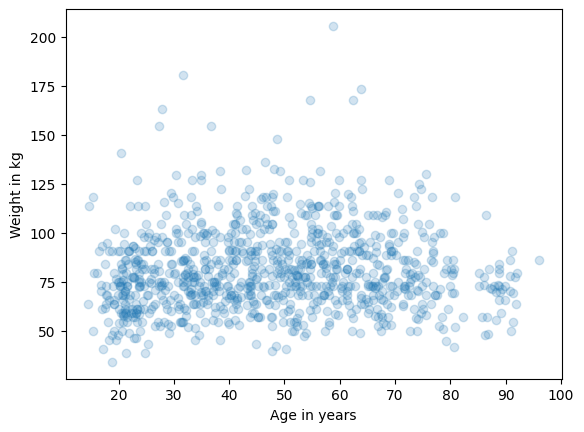

In [14]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Add jittering to age
age = brfss['AGE'] + np.random.normal(0, 2.5, size=len(brfss))
# Extract weight
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o',alpha=0.2)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

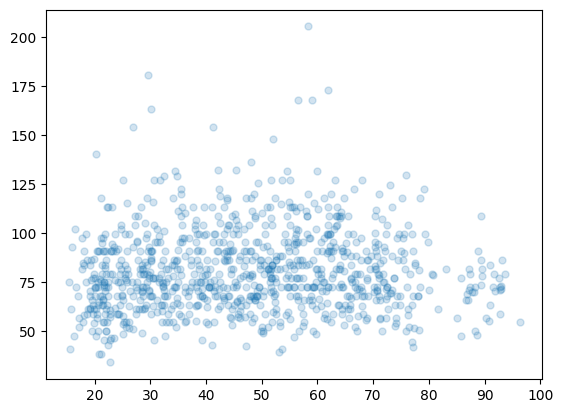

In [17]:
age = brfss['AGE'] + np.random.normal(0, 2.5, size=len(brfss))
weight = brfss['WTKG3']
plt.plot(age, weight, 'o', markersize=5, alpha=0.2)

plt.show()

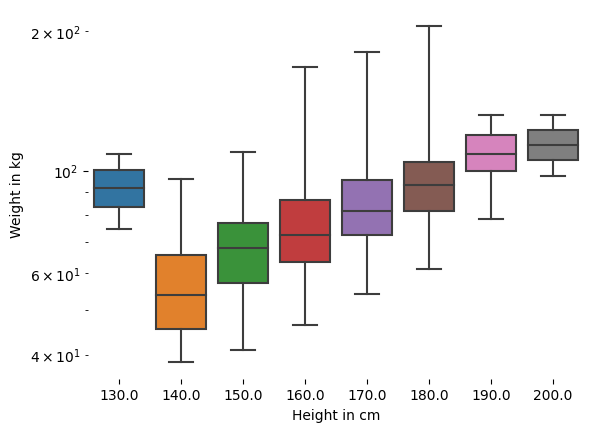

In [18]:
import seaborn as sns

# Drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(data=data,x='_HTMG10',y='WTKG3', whis=10)

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()


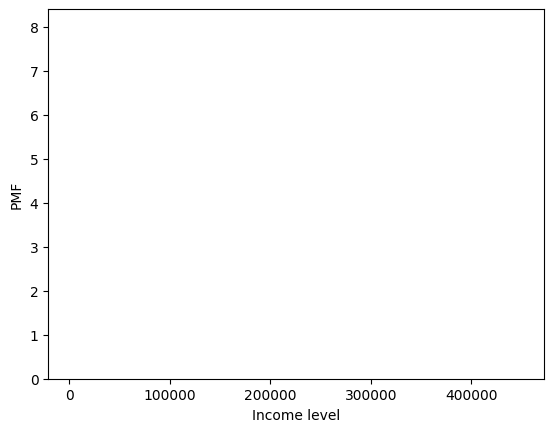

In [23]:
# Extract income
income = brfss['INCOME2']

# Plot the PMF
income_pmf = Pmf(income)
income_pmf.bar()

# Label the axes
plt.xlabel('Income level')
plt.ylabel('PMF')
plt.show()

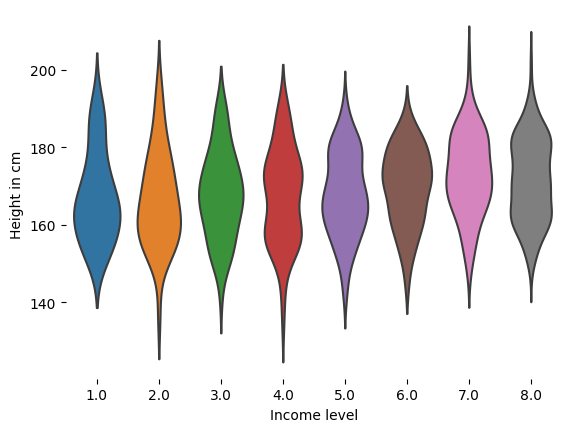

In [24]:
# Drop rows with missing data
data = brfss.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
sns.violinplot(data=data, x='INCOME2', y='HTM4', inner=None)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()


In [25]:
columns = ['HTM4', 'WTKG3', 'AGE']
subset = brfss[columns]
subset.corr()

,HTM4,WTKG3,AGE
HTM4,1.000000,0.512347,-0.086079
WTKG3,0.512347,1.000000,0.051345
AGE,-0.086079,0.051345,1.000000


In [26]:
# Select columns
columns = ['AGE','INCOME2','_VEGESU1']
subset = brfss[columns]

# Compute the correlation matrix
print(subset.corr())

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.014141 -0.021548
INCOME2  -0.014141  1.000000  0.115264
_VEGESU1 -0.021548  0.115264  1.000000


In [27]:
from scipy.stats import linregress

# Extract the variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Compute the linear regression
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.07000027412424817, intercept=1.5413758521321232, rvalue=0.11526352353306703, pvalue=0.0015115444024927935, stderr=0.021983967667553426, intercept_stderr=0.1391883671176333)


### Simple linear regression

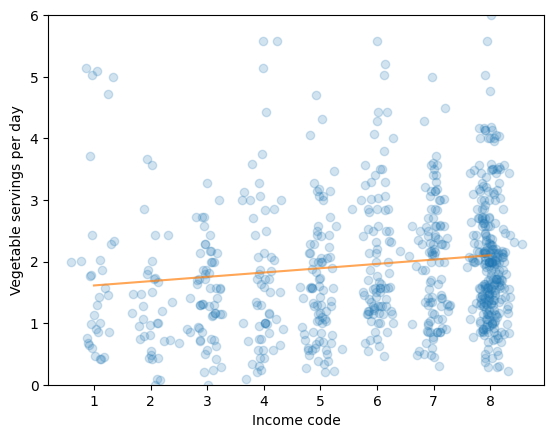

In [28]:
# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(),xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()